# সম্ভাবনা এবং পরিসংখ্যানের পরিচিতি  
এই নোটবুকে, আমরা পূর্বে আলোচনা করা কিছু ধারণা নিয়ে কাজ করব। সম্ভাবনা এবং পরিসংখ্যানের অনেক ধারণা Python-এর ডেটা প্রক্রিয়াকরণের প্রধান লাইব্রেরিগুলিতে, যেমন `numpy` এবং `pandas`, ভালোভাবে উপস্থাপিত।  


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## র‍্যান্ডম ভেরিয়েবল এবং ডিস্ট্রিবিউশন  
চলুন ০ থেকে ৯ এর মধ্যে একটি ইউনিফর্ম ডিস্ট্রিবিউশন থেকে ৩০টি মানের একটি নমুনা নিই। আমরা গড় এবং ভ্যারিয়েন্সও গণনা করব।  


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


নমুনায় কতগুলি ভিন্ন মান রয়েছে তা দৃশ্যত অনুমান করতে, আমরা **হিস্টোগ্রাম** আঁকতে পারি:


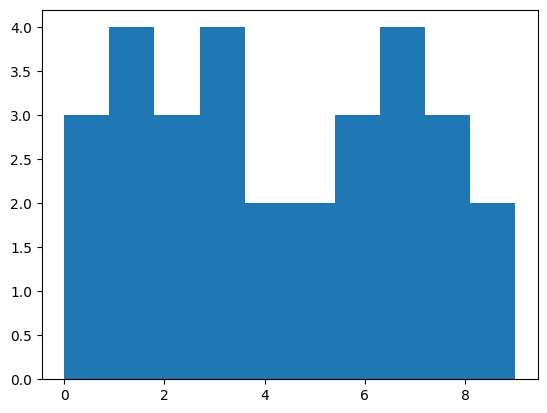

In [119]:
plt.hist(sample)
plt.show()

## বাস্তব ডেটা বিশ্লেষণ

বাস্তব ডেটা বিশ্লেষণের সময় গড় এবং বৈচিত্র্য খুবই গুরুত্বপূর্ণ। চলুন বেসবল খেলোয়াড়দের সম্পর্কে ডেটা লোড করি [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights) থেকে।


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


আমরা এখানে ডেটা বিশ্লেষণের জন্য [**Pandas**](https://pandas.pydata.org/) নামক একটি প্যাকেজ ব্যবহার করছি। এই কোর্সে আমরা পরে Pandas এবং পাইথনে ডেটা নিয়ে কাজ করার বিষয়ে আরও আলোচনা করব।

চলুন বয়স, উচ্চতা এবং ওজনের গড় মান গণনা করি:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

এবার চলুন উচ্চতার উপর মনোযোগ দিই এবং মান বিচ্যুতি ও বৈচিত্র্য গণনা করি:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


গড়ের পাশাপাশি, মধ্যমান এবং চতুর্থাংশগুলোর দিকে নজর দেওয়া যৌক্তিক। এগুলোকে একটি **বক্স প্লট** ব্যবহার করে চিত্রিত করা যেতে পারে:


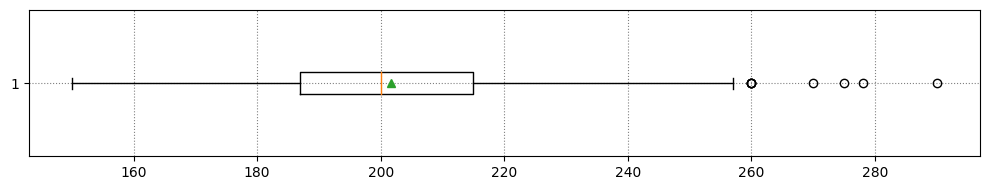

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

আমরা আমাদের ডেটাসেটের উপসেটগুলির বক্স প্লটও তৈরি করতে পারি, উদাহরণস্বরূপ, খেলোয়াড়ের ভূমিকা অনুযায়ী গোষ্ঠীবদ্ধ করে।


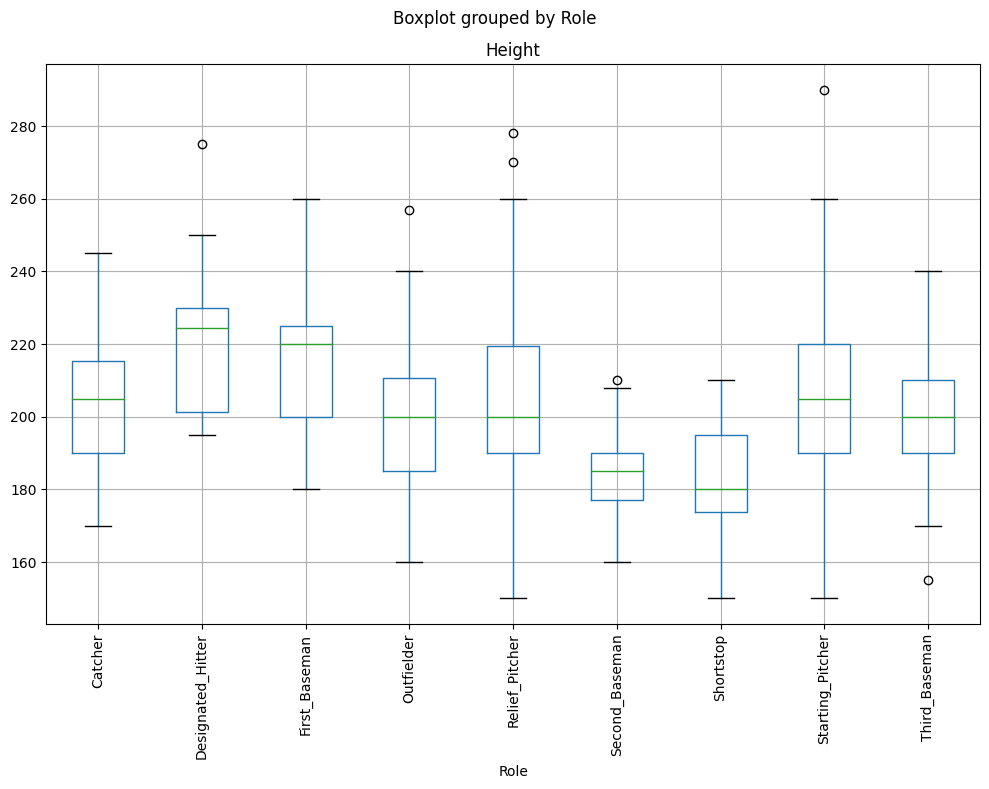

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Note**: এই ডায়াগ্রামটি ইঙ্গিত দেয় যে গড়ে, প্রথম বেসম্যানদের উচ্চতা দ্বিতীয় বেসম্যানদের উচ্চতার তুলনায় বেশি। পরে আমরা শিখব কীভাবে এই অনুমানটি আরও আনুষ্ঠানিকভাবে পরীক্ষা করা যায় এবং কীভাবে আমাদের ডেটা পরিসংখ্যানগতভাবে গুরুত্বপূর্ণ তা প্রদর্শন করা যায়।  

বয়স, উচ্চতা এবং ওজন সবই ধারাবাহিক র্যান্ডম ভেরিয়েবল। আপনি কি মনে করেন এদের বিতরণ কেমন? এটি জানার একটি ভালো উপায় হলো মানগুলোর হিস্টোগ্রাম আঁকা:


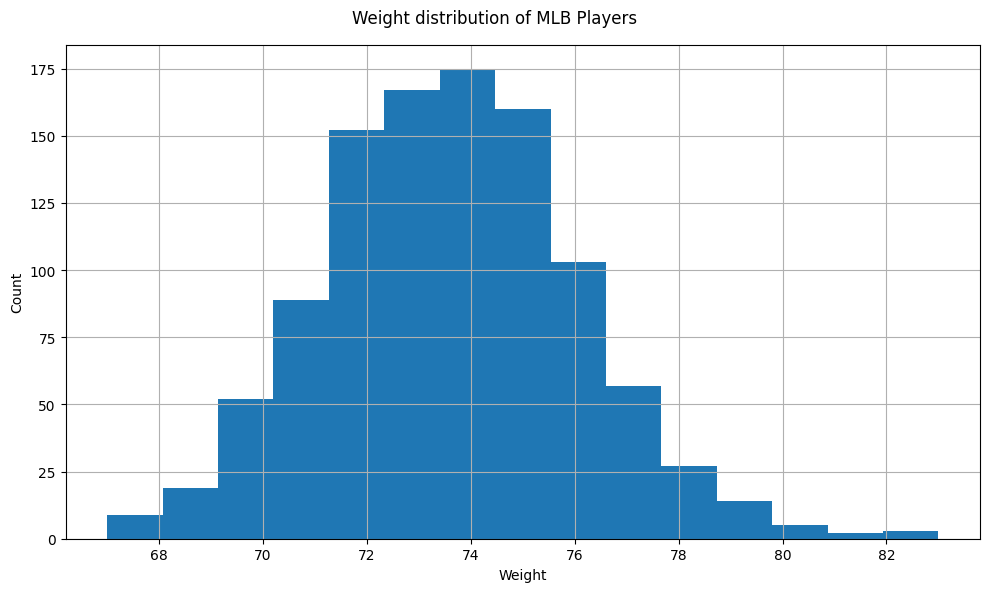

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## স্বাভাবিক বণ্টন

চলুন একটি কৃত্রিম ওজনের নমুনা তৈরি করি যা আমাদের প্রকৃত ডেটার মতোই গড় এবং বৈচিত্র্য অনুসরণ করে স্বাভাবিক বণ্টন মেনে চলে:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

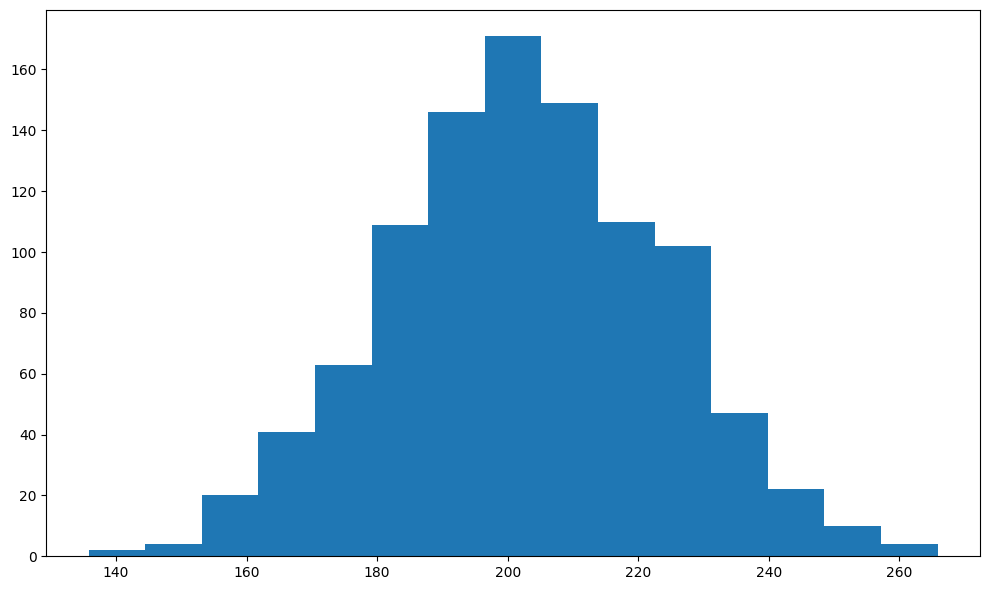

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

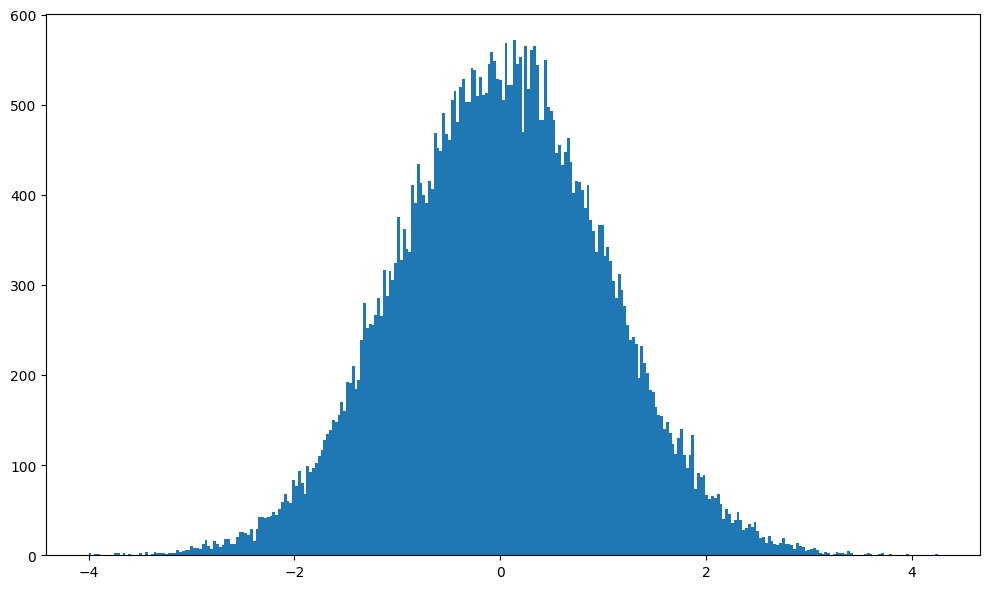

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

যেহেতু বাস্তব জীবনের বেশিরভাগ মান সাধারণত স্বাভাবিক বণ্টিত, আমাদের নমুনা ডেটা তৈরি করতে একটি অভিন্ন র্যান্ডম সংখ্যা জেনারেটর ব্যবহার করা উচিত নয়। এখানে কী ঘটে যদি আমরা একটি অভিন্ন বণ্টন (যা `np.random.rand` দ্বারা তৈরি) ব্যবহার করে ওজন তৈরি করার চেষ্টা করি:


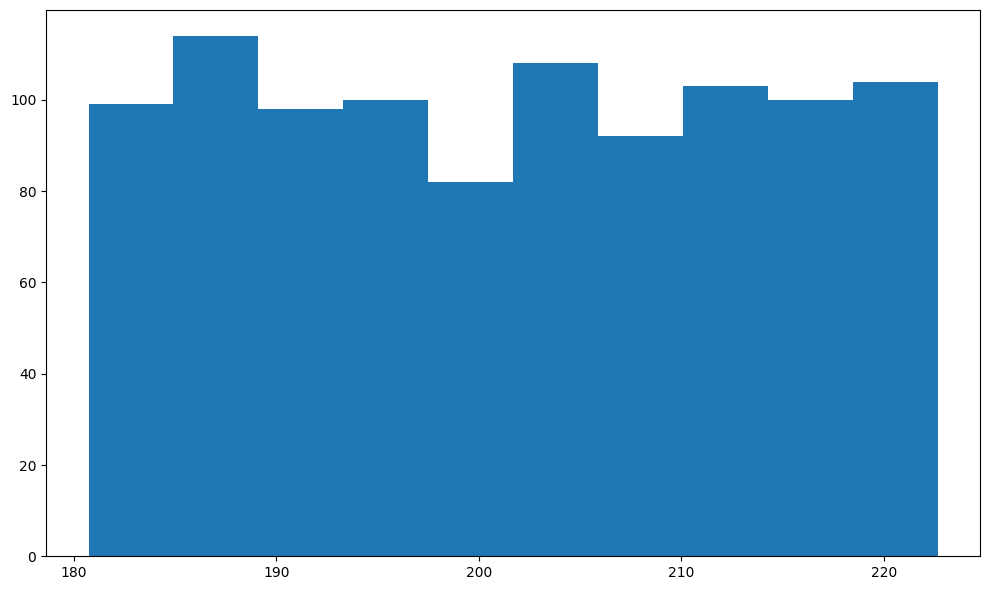

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## বিশ্বাসযোগ্যতার পরিসীমা

এবার আমরা বেসবল খেলোয়াড়দের ওজন এবং উচ্চতার জন্য বিশ্বাসযোগ্যতার পরিসীমা গণনা করব। আমরা এই কোড ব্যবহার করব [এই স্ট্যাকওভারফ্লো আলোচনার থেকে](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## হাইপোথিসিস টেস্টিং

চলুন আমাদের বেসবল খেলোয়াড়দের ডেটাসেটে বিভিন্ন ভূমিকা অন্বেষণ করি:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

চলুন এই অনুমানটি পরীক্ষা করি যে প্রথম বেসম্যানরা দ্বিতীয় বেসম্যানদের চেয়ে লম্বা। এটি পরীক্ষা করার সবচেয়ে সহজ উপায় হল আত্মবিশ্বাসের পরিসীমা পরীক্ষা করা:


In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


আমরা দেখতে পাচ্ছি যে সময়কালগুলো একে অপরের সাথে ওভারল্যাপ করে না।

পরিসংখ্যানগতভাবে আরও সঠিক উপায়ে হাইপোথিসিস প্রমাণ করার জন্য একটি **Student t-test** ব্যবহার করা হয়:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


`ttest_ind` ফাংশন দুটি মান প্রদান করে:  
* p-value হলো দুইটি বণ্টনের একই গড় মান থাকার সম্ভাবনা। আমাদের ক্ষেত্রে, এটি খুবই কম, যা নির্দেশ করে যে প্রথম বেসম্যানরা লম্বা হওয়ার পক্ষে শক্তিশালী প্রমাণ রয়েছে।  
* t-value হলো স্বাভাবিকীকৃত গড় পার্থক্যের একটি মধ্যবর্তী মান, যা t-পরীক্ষায় ব্যবহৃত হয় এবং এটি নির্দিষ্ট একটি আত্মবিশ্বাস মানের জন্য একটি সীমা মানের সাথে তুলনা করা হয়।  


## কেন্দ্রীয় সীমা উপপাদ্য ব্যবহার করে একটি নরমাল বিতরণ সিমুলেট করা

পাইথনের ছদ্ম-র্যান্ডম জেনারেটর আমাদের একটি ইউনিফর্ম বিতরণ প্রদান করার জন্য ডিজাইন করা হয়েছে। যদি আমরা একটি নরমাল বিতরণের জন্য জেনারেটর তৈরি করতে চাই, তাহলে আমরা কেন্দ্রীয় সীমা উপপাদ্য ব্যবহার করতে পারি। একটি নরমাল বিতরণযুক্ত মান পেতে, আমরা ইউনিফর্ম-জেনারেট করা নমুনার গড় হিসাব করব।


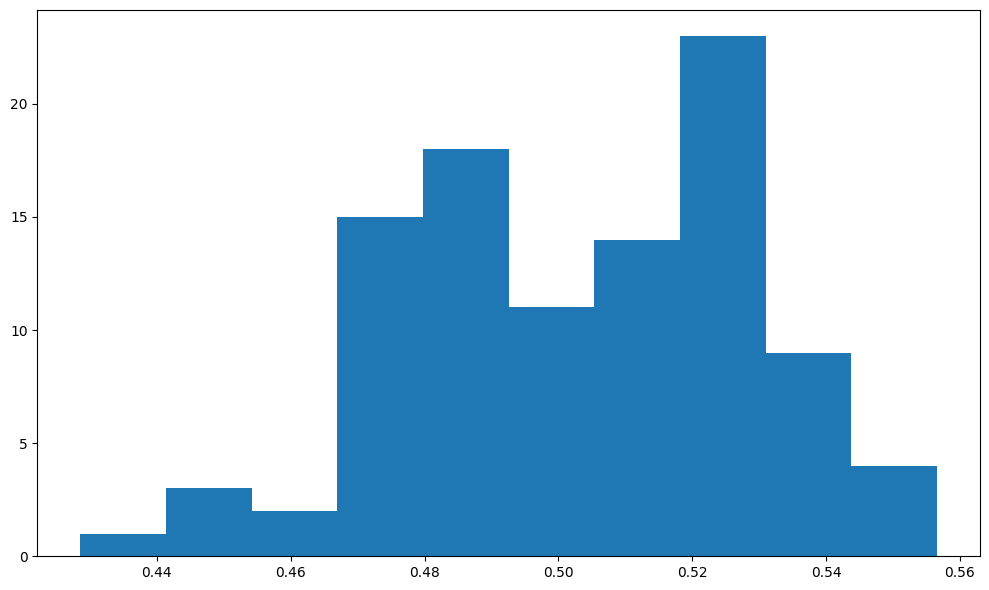

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## সম্পর্ক এবং ইভিল বেসবল কর্প

সম্পর্ক আমাদের ডেটা সিকোয়েন্সগুলোর মধ্যে সম্পর্ক খুঁজে বের করতে সাহায্য করে। আমাদের খেলনা উদাহরণে, চলুন ধরে নিই একটি ইভিল বেসবল কর্পোরেশন আছে যারা তাদের খেলোয়াড়দের উচ্চতার ভিত্তিতে বেতন দেয় - খেলোয়াড় যত লম্বা, তত বেশি টাকা পায়। ধরে নিই একটি বেসিক বেতন $1000, এবং উচ্চতার উপর নির্ভর করে $0 থেকে $100 পর্যন্ত একটি অতিরিক্ত বোনাস। আমরা MLB-এর আসল খেলোয়াড়দের নেব এবং তাদের কাল্পনিক বেতন হিসাব করব:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


এবার চলুন ঐ সিকোয়েন্সগুলোর কোভেরিয়েন্স এবং করেলেশন গণনা করি। `np.cov` আমাদের একটি তথাকথিত **কোভেরিয়েন্স ম্যাট্রিক্স** দেবে, যা কোভেরিয়েন্সকে একাধিক ভেরিয়েবলের জন্য সম্প্রসারিত করে। কোভেরিয়েন্স ম্যাট্রিক্স $M$-এর উপাদান $M_{ij}$ হলো ইনপুট ভেরিয়েবল $X_i$ এবং $X_j$-এর মধ্যে করেলেশন, এবং ডায়াগোনাল মান $M_{ii}$ হলো $X_{i}$-এর ভ্যারিয়েন্স। একইভাবে, `np.corrcoef` আমাদের **করেলেশন ম্যাট্রিক্স** দেবে।


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


একটি সম্পর্ক ১ এর সমান মানে দুটি ভেরিয়েবলের মধ্যে একটি শক্তিশালী **রৈখিক সম্পর্ক** রয়েছে। আমরা একটি ভেরিয়েবলের বিপরীতে অন্যটি প্লট করে রৈখিক সম্পর্কটি দৃশ্যত দেখতে পারি:


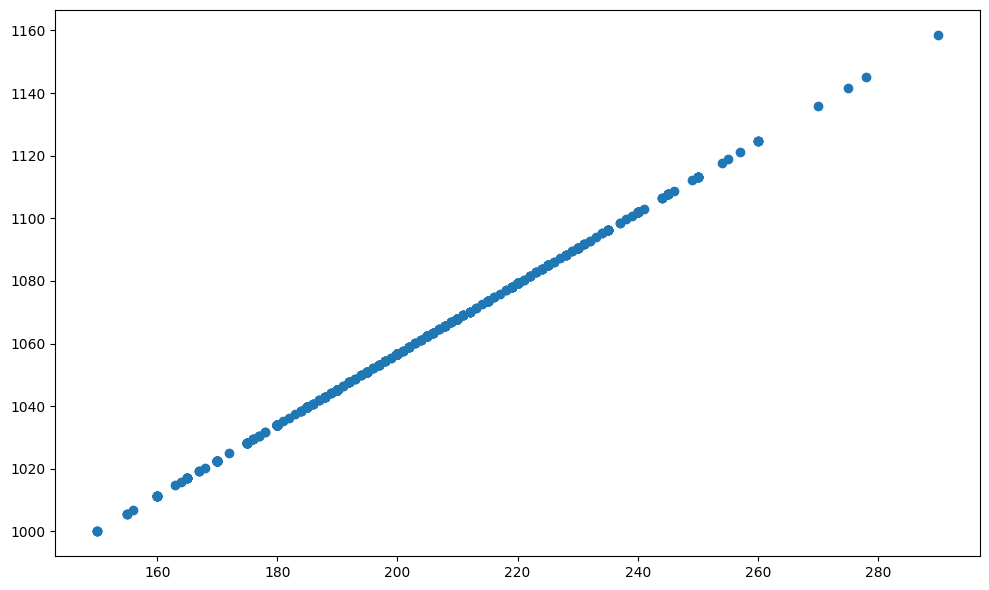

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

চলুন দেখি কী ঘটে যদি সম্পর্কটি রৈখিক না হয়। ধরুন আমাদের কর্পোরেশন উচ্চতা এবং বেতনের মধ্যে স্পষ্ট রৈখিক নির্ভরতা লুকানোর সিদ্ধান্ত নিয়েছে এবং সূত্রে কিছু অরৈখিকতা যোগ করেছে, যেমন `sin`:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


এই ক্ষেত্রে, সম্পর্কটি সামান্য কম, তবে এটি এখনও বেশ উচ্চ। এখন, সম্পর্কটি আরও কম স্পষ্ট করতে, আমরা বেতনের সাথে কিছু র্যান্ডম ভেরিয়েবল যোগ করে কিছু অতিরিক্ত এলোমেলোতা যোগ করতে চাইতে পারি। চলুন দেখি কী ঘটে:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


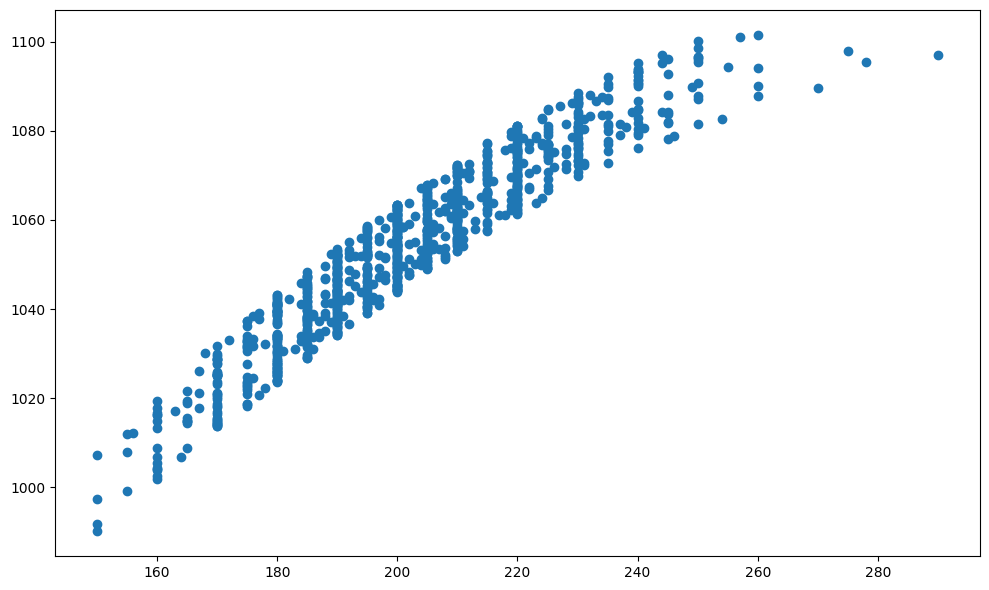

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

আপনি কি অনুমান করতে পারেন কেন বিন্দুগুলো এমনভাবে উল্লম্ব রেখায় সাজানো হয়েছে?

আমরা একটি কৃত্রিমভাবে তৈরি ধারণা, যেমন বেতন, এবং পর্যবেক্ষণ করা পরিবর্তনশীল *উচ্চতা*-এর মধ্যে সম্পর্ক লক্ষ্য করেছি। চলুন দেখি দুটি পর্যবেক্ষণ করা পরিবর্তনশীল, যেমন উচ্চতা এবং ওজন, একে অপরের সাথে সম্পর্কিত কিনা:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

দুঃখজনকভাবে, আমরা কোনো ফলাফল পাইনি - শুধুমাত্র কিছু অদ্ভুত `nan` মান। এর কারণ হলো আমাদের সিরিজের কিছু মান সংজ্ঞায়িত নয়, যা `nan` দ্বারা উপস্থাপিত হয়েছে, এবং এর ফলে অপারেশনের ফলাফলও সংজ্ঞায়িত হয়নি। ম্যাট্রিক্সটি পর্যবেক্ষণ করলে দেখা যায় যে `Weight` কলামটি সমস্যাজনক, কারণ `Height` মানগুলোর মধ্যে স্ব-সম্পর্ক (self-correlation) গণনা করা হয়েছে।

> এই উদাহরণটি **ডেটা প্রস্তুতি** এবং **পরিষ্কারকরণ** এর গুরুত্বকে তুলে ধরে। সঠিক ডেটা ছাড়া আমরা কিছুই গণনা করতে পারি না।

চলুন `fillna` পদ্ধতি ব্যবহার করে অনুপস্থিত মানগুলো পূরণ করি এবং সম্পর্ক (correlation) গণনা করি:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

আসলেই একটি সম্পর্ক রয়েছে, তবে আমাদের কৃত্রিম উদাহরণের মতো এতটা শক্তিশালী নয়। প্রকৃতপক্ষে, যদি আমরা একটি মানের বিপরীতে অন্য মানের স্ক্যাটার প্লট দেখি, তবে সম্পর্কটি অনেক কম স্পষ্ট হবে:


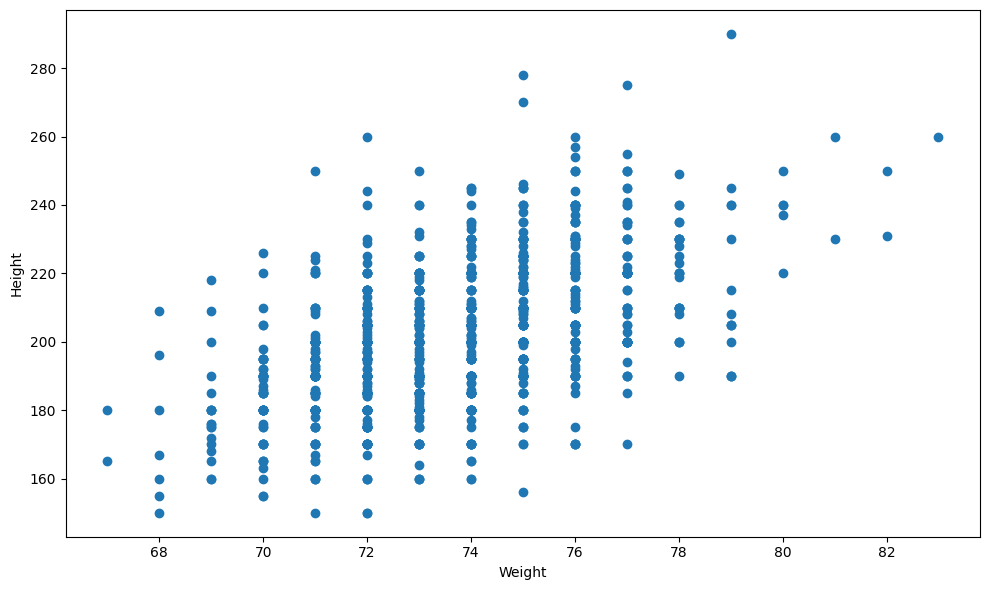

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## উপসংহার

এই নোটবুকে আমরা শিখেছি কীভাবে ডেটার উপর মৌলিক অপারেশন সম্পাদন করে পরিসংখ্যানগত ফাংশন গণনা করতে হয়। আমরা এখন জানি কীভাবে গণিত এবং পরিসংখ্যানের একটি শক্তিশালী পদ্ধতি ব্যবহার করে কিছু অনুমান প্রমাণ করতে হয় এবং কীভাবে একটি ডেটা নমুনা থেকে প্রদত্ত যেকোনো ভেরিয়েবলের জন্য আত্মবিশ্বাসের পরিসীমা গণনা করতে হয়।



---

**অস্বীকৃতি**:  
এই নথিটি AI অনুবাদ পরিষেবা [Co-op Translator](https://github.com/Azure/co-op-translator) ব্যবহার করে অনুবাদ করা হয়েছে। আমরা যথাসম্ভব সঠিক অনুবাদ প্রদানের চেষ্টা করি, তবে অনুগ্রহ করে মনে রাখবেন যে স্বয়ংক্রিয় অনুবাদে ত্রুটি বা অসঙ্গতি থাকতে পারে। মূল ভাষায় থাকা নথিটিকে প্রামাণিক উৎস হিসেবে বিবেচনা করা উচিত। গুরুত্বপূর্ণ তথ্যের জন্য, পেশাদার মানব অনুবাদ সুপারিশ করা হয়। এই অনুবাদ ব্যবহারের ফলে কোনো ভুল বোঝাবুঝি বা ভুল ব্যাখ্যা হলে আমরা তার জন্য দায়ী থাকব না।
